In [26]:
# TODO
# Add bars between volumes (or shrink volume bars slightly)
# Remove high volume tickmarks
# Add legend/colorcoding

In [27]:
length = 1000000 # Settings stuff, please set!
num_candles = 80
hist_data = True

In [28]:
# Header - Please Run initially - Please Change file directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import re

pnl = 'logs/Round1/'+'prices_round_1_day_-1'+'.csv'
pnl_data = pd.read_csv(pnl, sep=';')

log = 'logs/Round1/'+'trades_round_1_day_-2_nn'+'.csv'
log2 = 'logs/Round1/'+'trades_round_1_day_-1_nn'+'.csv'
log3 = 'logs/Round1/'+'trades_round_1_day_0_nn'+'.csv'
if hist_data:
    cnd = pd.read_csv(log, sep=';')
    cnd2 = pd.read_csv(log2, sep=';')
    cnd3 = pd.read_csv(log3, sep=';')
else: 
    with open(log) as file:
        lines = file.readlines()
    
    for i in range(len(lines)):
        if(re.match('Trade History:', lines[i])):
            cnd = pd.json_normalize(json.loads('\n'.join(lines[i+1::])))

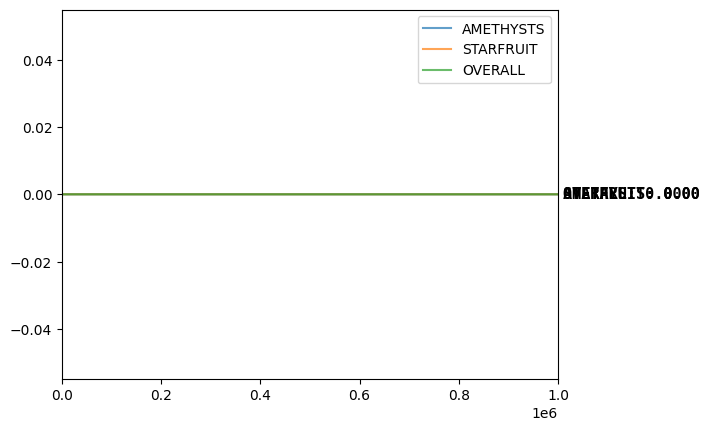

In [29]:
def display_pnl(csv):
    # P/L Graph
    fig, ax = plt.subplots()
    ax.set_xlim(0, length)
    for idx, name in enumerate(csv['product'].unique()):
        ax.plot(csv[csv['product'] == name]['timestamp'], csv[csv['product'] == name]['profit_and_loss'], alpha=0.7, label=name)
    
        data = csv[csv['timestamp'] == csv['timestamp'].max()]
        text = data['product'].values[idx]
        y_loc = data['profit_and_loss'].values[idx]
        ax.text(
            length * 1.01, 
            y_loc, 
            text + f': {y_loc:.2f}', 
            fontsize=11, 
            weight="bold", 
            fontfamily="monospace", 
            va="center"
        )
    
    csv_merge = csv.drop(['product', 'bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price',], axis=1).groupby('timestamp')['profit_and_loss'].sum()
    ax.plot(csv_merge.index, list(csv_merge), alpha=0.7, label='OVERALL')
    
    data = csv_merge[csv_merge.index.max()]
    text = 'OVERALL'
    y_loc = data
    ax.text(
        length * 1.01, 
        y_loc, 
        text + f': {y_loc:.2f}', 
        fontsize=11, 
        weight="bold", 
        fontfamily="monospace", 
        va="center"
    )
    
    leg=ax.legend()
    plt.show()

display_pnl(pnl_data)

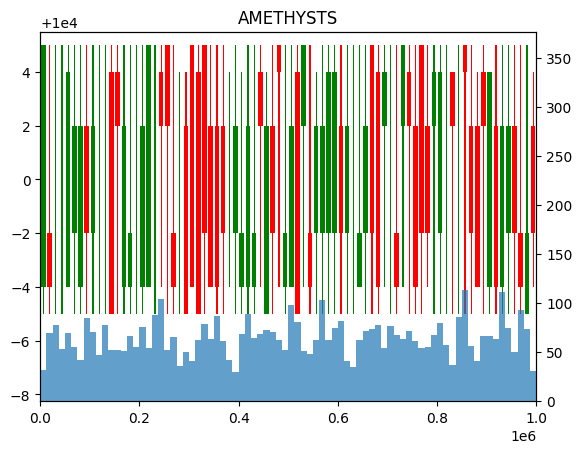

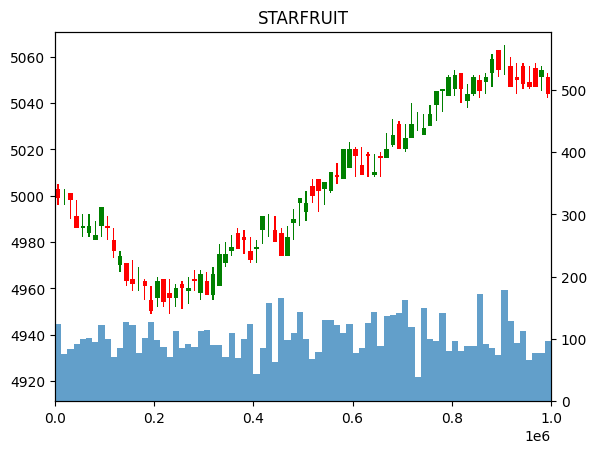

In [30]:
# Stock Ticker
def display_cnd(logs):
    for idx, name in enumerate(logs['symbol'].unique()):
        fig, ax = plt.subplots()
        data = logs[logs['symbol'] == name]
    
        logs_trim = data.drop(['buyer', 'seller', 'currency'], axis=1)
        logs_trim['candle_idx'] = logs_trim['timestamp'] // (length/num_candles) * (length/num_candles)
    
        logs_cnd = logs_trim.groupby('candle_idx')['price'].agg(['min', 'max', 'first', 'last'])
        up = logs_cnd[logs_cnd['last'] >= logs_cnd['first']] 
        down = logs_cnd[logs_cnd['last'] < logs_cnd['first']] 
        col1 = 'green'
        col2 = 'red'
        width = (length/num_candles) * 3//4
        width2 = min(length // 400, (length/num_candles) // 4)
        half_bar = (length/num_candles) // 2
    
        data_max = logs_cnd['max'].max()
        data_min = logs_cnd['min'].min()
        range = data_max - data_min
        ax.set_xlim(0, length)
        ax.set_ylim(data_min-range*0.05-range*1.1/4, data_max+range*0.05)
        ax.bar(up.index+half_bar, up['last']-up['first'], width, bottom=up['first'], color=col1) 
        ax.bar(up.index+half_bar, up['max']-up['last'], width2, bottom=up['last'], color=col1) 
        ax.bar(up.index+half_bar, up['min']-up['first'], width2, bottom=up['first'], color=col1) 
          
        # Plotting down prices of the stock 
        ax.bar(down.index+half_bar, down['last']-down['first'], width, bottom=down['first'], color=col2) 
        ax.bar(down.index+half_bar, down['max']-down['last'], width2, bottom=down['last'], color=col2) 
        ax.bar(down.index+half_bar, down['min']-down['first'], width2, bottom=down['first'], color=col2) 
    
        ax_vol = ax.twinx()
        logs_vol = logs_trim.groupby('candle_idx')['quantity'].sum()
        ax_vol.set_ylim(0, logs_vol.max()*10/3)
        ax_vol.hist(np.linspace(0, length, num=num_candles+1)[:-1], weights=logs_vol, bins=np.linspace(0, length, num=num_candles+1), alpha=0.7)
        vol_ticks = ax_vol.get_yticks()
        #for i in range(len(vol_ticks)):
            #if(vol_ticks[i] > 
          
        # displaying candlestick chart of stock data  
        # of a week 
        ax.set_title(name)
        plt.show() 

display_cnd(cnd)

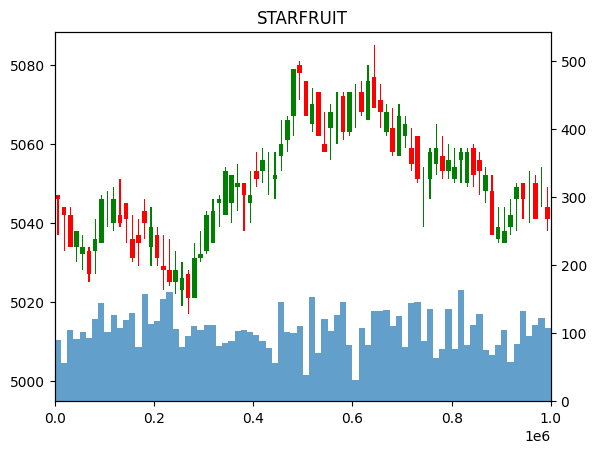

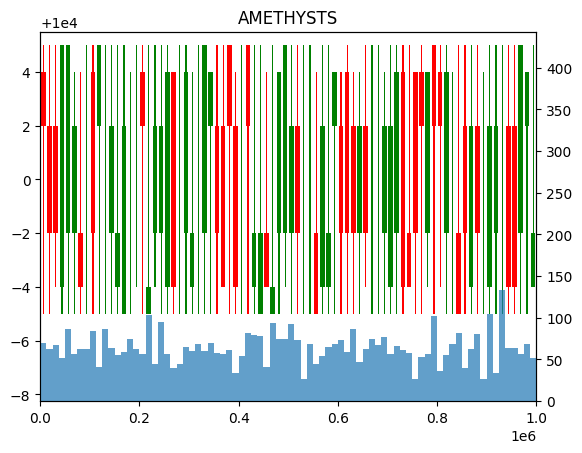

In [31]:
display_cnd(cnd2)

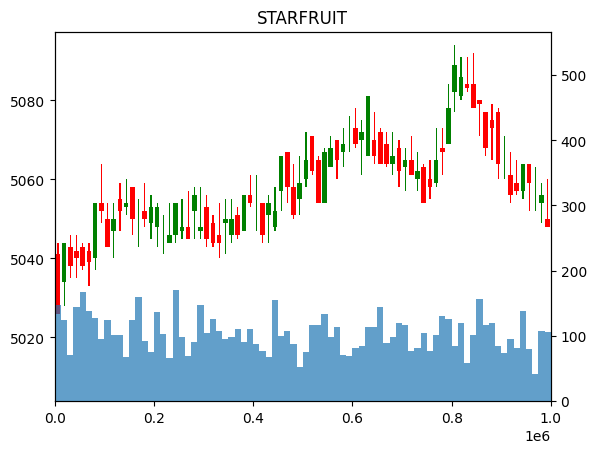

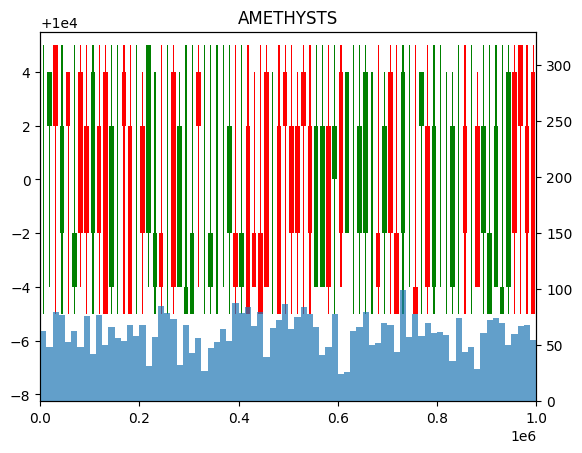

In [32]:
display_cnd(cnd3)